In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Dataset/Test_Data

/content/drive/MyDrive/Dataset/Test_Data


In [3]:
!ls

DeepFashion_Try_On_vatsav  test_color	   test_edge  test_label  test_pose
mca-project		   test_colormask  test_img   test_mask


In [4]:
!pip install opencv-python-headless

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from PIL import Image

image_path = '/content/drive/MyDrive/Dataset/Test_Data/test_img/014728_0.jpg'
image = Image.open(image_path)

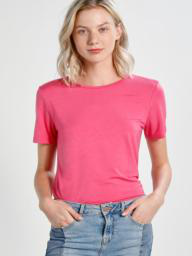

In [6]:
image.show()

In [7]:
cd test_color

/content/drive/MyDrive/Dataset/Test_Data/test_color


In [8]:
!ls

 000001_1.jpg	     003852_1.jpg   007797_1.jpg   011736_1.jpg   015688_1.jpg
 000010_1.jpg	     003861_1.jpg   007808_1.jpg   011745_1.jpg   015697_1.jpg
 000020_1.jpg	     003874_1.jpg   007817_1.jpg   011761_1.jpg   015707_1.jpg
 000028_1.jpg	     003882_1.jpg   007826_1.jpg   011769_1.jpg   015715_1.jpg
 000038_1.jpg	     003890_1.jpg   007834_1.jpg   011781_1.jpg   015724_1.jpg
 000048_1.jpg	     003898_1.jpg   007848_1.jpg   011790_1.jpg   015732_1.jpg
 000057_1.jpg	     003915_1.jpg   007856_1.jpg   011798_1.jpg   015740_1.jpg
 000066_1.jpg	     003925_1.jpg   007864_1.jpg   011806_1.jpg   015748_1.jpg
 000074_1.jpg	     003935_1.jpg   007874_1.jpg   011816_1.jpg   015759_1.jpg
 000082_1.jpg	     003945_1.jpg   007882_1.jpg   011825_1.jpg   015767_1.jpg
 000097_1.jpg	     003953_1.jpg   007891_1.jpg   011833_1.jpg   015776_1.jpg
 000109_1.jpg	     003963_1.jpg   007899_1.jpg   011842_1.jpg   015785_1.jpg
 000118_1.jpg	     003972_1.jpg   007914_1.jpg   011850_1.jpg   015794_1.jpg

NOW SELECT ANY OF THE IMAGE CLOTH FOR FITTING

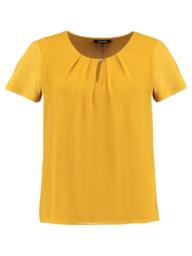

In [9]:
from IPython.display import Image
Image("000048_1.jpg")

In [10]:
import os
os.getcwd()

'/content/drive/MyDrive/Dataset/Test_Data/test_color'

NOW CHANNGING THE PATH FROM THE DATASET TO THE GOOGLE DRIVE WORKING DIRECTORY

In [11]:
%cd ..

/content/drive/MyDrive/Dataset/Test_Data


In [12]:
ls

DeepFashion_Try_On_vatsav/  test_colormask/  test_label/
mca-project/                test_edge/       test_mask/
test_color/                 test_img/        test_pose/


In [18]:
!git clone https://github.com/anoobapk/mca-project.git
%cd mca-project

fatal: destination path 'mca-project' already exists and is not an empty directory.
/content/drive/MyDrive/Dataset/Test_Data/mca-project/mca-project/mca-project/mca-project/mca-project/mca-project


In [20]:
!ls

ACGPN_inference
ACGPN_train
A_Flow-Based_Generative_Network_for_Photo-Realistic_Virtual_Try-on.pdf
Data_preprocessing
Dataset
mca-project
README.md
try_on.py
uidesign.py
virtualtryon-1.ipynb
virtualtryon-2.ipynb
virtualtryon-3.ipynb


COPYING DATASET(LOADING)

In [21]:
!mkdir Dataset

mkdir: cannot create directory ‘Dataset’: File exists


In [22]:
import os
os.getcwd()

'/content/drive/MyDrive/Dataset/Test_Data/mca-project/mca-project/mca-project/mca-project/mca-project/mca-project'

COPYING  DATASET (COLOR, EDGE, MASK, COLORMASK)

In [23]:
!cp -r /content/drive/MyDrive/Dataset/Test_Data/test_color Dataset
!cp -r /content/drive/MyDrive/Dataset/Test_Data/test_edge Dataset
!cp -r /content/drive/MyDrive/Dataset/Test_Data/test_mask Dataset
!cp -r /content/drive/MyDrive/Dataset/Test_Data/test_colormask Dataset

In [24]:
# copy TestData
!cp -r /content/drive/MyDrive/Dataset/Test_Data/test_img Dataset
!cp -r /content/drive/MyDrive/Dataset/Test_Data/test_pose Dataset
!cp -r /content/drive/MyDrive/Dataset/Test_Data/test_label Dataset

In [25]:
!ls

ACGPN_inference
ACGPN_train
A_Flow-Based_Generative_Network_for_Photo-Realistic_Virtual_Try-on.pdf
Data_preprocessing
Dataset
mca-project
README.md
try_on.py
uidesign.py
virtualtryon-1.ipynb
virtualtryon-2.ipynb
virtualtryon-3.ipynb


SHOW NUMBER OF FILES IN THE DIRECTORY

In [26]:
import os
print('test image    :', len(os.listdir('./Dataset/test_img')))   # test image (person with clothes)
print('test pose     :', len(os.listdir('./Dataset/test_pose')))  # pose keypoints per test image
print('test label    :', len(os.listdir('./Dataset/test_label'))) # label (dark frame) of test image (for pose-map)
print('test color    :', len(os.listdir('./Dataset/test_color')))     # color clothes  
print('test edge     :', len(os.listdir('./Dataset/test_edge')))      # edge of clothes
print('test mask     :', len(os.listdir('./Dataset/test_mask')))      # test mask        
print('test colormask:', len(os.listdir('./Dataset/test_colormask'))) # test colormask

test image    : 2032
test pose     : 2032
test label    : 2032
test color    : 2043
test edge     : 2032
test mask     : 12064
test colormask: 10030


Read pose

In [27]:
# read pose
import numpy as np
import json

# pose_name = "/content/mca-project/Dataset/test_pose/000001_0_keypoints.json"
pose_name = "/content/drive/MyDrive/Dataset/Test_Data/test_pose/014728_0_keypoints.json"
with open(pose_name, 'r') as f:
     pose_label = json.load(f)
     pose_data = pose_label['people'][0]['pose_keypoints']
     pose_data = np.array(pose_data)
     pose_data = pose_data.reshape((-1,3))
print(pose_data)
print(len(pose_data))

[[9.37322835e+01 4.02618182e+01 8.79261494e-01]
 [1.00787402e+02 9.09963636e+01 6.15809016e-01]
 [4.91338583e+01 9.44872727e+01 5.99768236e-01]
 [4.38425197e+01 1.69425455e+02 6.93759158e-01]
 [4.56062992e+01 1.98283636e+02 7.20822603e-01]
 [1.49669291e+02 9.07636364e+01 5.97469367e-01]
 [1.56472441e+02 1.33120000e+02 1.25472964e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.30708661e+01 2.18298182e+02 2.17209318e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.29763780e+02 2.19229091e+02 2.27997468e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.31496063e+01 3.11854545e+01 9.39323455e-01]
 [1.03055118e+02 2.93236364e+01 9.43901032e-01]
 [7.10551181e+01 3.77018182e+01 6.74027175e-01]
 [1.18173228e+02 3.14181818e+01 8.73797506e-01]]
18


SHOWING KEY POINGS ON TESTING IMAGE

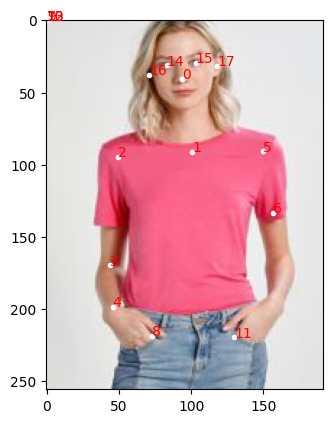

18


In [28]:
import matplotlib.pyplot as plt
#img = plt.imread('/content/mca-project/Dataset/test_img/000001_0.jpg')
img = plt.imread('/content/drive/MyDrive/Dataset/Test_Data/test_img/014728_0.jpg')
plt.imshow(img)
i=0
for x,y,z in pose_data: 
    plt.plot(x, y, 'w.') # 'w.': color='white', marker='.'
    plt.text(x, y, str(i), color='r', fontsize=10)
    i+=1
plt.show()
print(i)

In [29]:
import os
os.getcwd()

'/content/drive/MyDrive/Dataset/Test_Data/mca-project/mca-project/mca-project/mca-project/mca-project/mca-project'

In [30]:
ls

ACGPN_inference/
ACGPN_train/
A_Flow-Based_Generative_Network_for_Photo-Realistic_Virtual_Try-on.pdf
Data_preprocessing/
Dataset/
mca-project/
README.md
try_on.py
uidesign.py
virtualtryon-1.ipynb
virtualtryon-2.ipynb
virtualtryon-3.ipynb


COPY  MODEL FROM DRIVE

In [31]:
%cd ACGPN_inference

/content/drive/MyDrive/Dataset/Test_Data/mca-project/mca-project/mca-project/mca-project/mca-project/mca-project/ACGPN_inference


In [32]:
!cp -rf /content/drive/MyDrive/Working/label2city checkpoints

In [33]:
import os
os.getcwd()

'/content/drive/MyDrive/Dataset/Test_Data/mca-project/mca-project/mca-project/mca-project/mca-project/mca-project/ACGPN_inference'

In [34]:
!pip install tensorboardX

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 6.4 MB/s eta 0:00:00


IN HERE CHOOSE THE T SHIRT MODEL THAT GOING TO CHECK FIT ON US

In [35]:
image_file = "018690_1.jpg"
!python test.py --dataroot ../Dataset --color_name {image_file}

?
------------ Options -------------
batchSize: 1
beta1: 0.5
checkpoints_dir: ./checkpoints
color_name: 018690_1.jpg
continue_train: False
data_type: 32
dataroot: ../Dataset
debug: False
display_freq: 100
display_winsize: 512
fineSize: 512
gpu_ids: [0]
input_nc: 3
isTrain: True
label_nc: 20
lambda_feat: 10.0
loadSize: 512
load_pretrain: ./checkpoints/label2city
lr: 0.0002
max_dataset_size: inf
model: pix2pixHD
nThreads: 2
n_blocks_global: 4
n_blocks_local: 3
n_downsample_global: 4
n_layers_D: 3
n_local_enhancers: 1
name: label2city
ndf: 64
netG: global
ngf: 64
niter: 100
niter_decay: 100
niter_fix_global: 0
no_flip: False
no_ganFeat_loss: False
no_html: False
no_lsgan: False
no_vgg_loss: False
norm: instance
num_D: 2
output_nc: 3
phase: test
pool_size: 0
print_freq: 100
resize_or_crop: scale_width
save_epoch_freq: 10
save_latest_freq: 1000
serial_batches: False
tf_log: False
use_dropout: False
verbose: False
which_epoch: latest
-------------- End ----------------
CustomDatasetDataLoade

In [36]:
import os
os.getcwd()

'/content/drive/MyDrive/Dataset/Test_Data/mca-project/mca-project/mca-project/mca-project/mca-project/mca-project/ACGPN_inference'

In [37]:
ls

checkpoints/    im_pose.jpg  options/      sample/          util/
data/           models/      __pycache__/  test.py
grid_sample.py  one_map.jpg  runs/         tps_grid_gen.py


In [38]:
!pip install tensorboardX

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import os
os.getcwd()

'/content/drive/MyDrive/Dataset/Test_Data/mca-project/mca-project/mca-project/mca-project/mca-project/mca-project/ACGPN_inference'

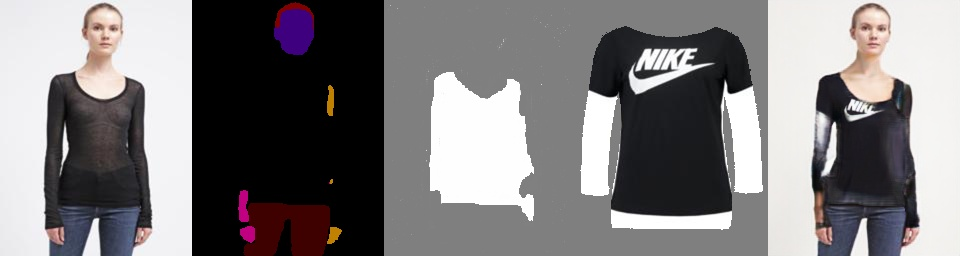

In [44]:
want_file = "000028_0.jpg"
from IPython.display import Image

# Display the image using the f-string
#Image(f"/content/mca-project/ACGPN_inference/mca-project/mca-project/ACGPN_inference/sample/{want_file}")
Image(f"/content/drive/MyDrive/Dataset/Test_Data/mca-project/mca-project/mca-project/mca-project/mca-project/mca-project/ACGPN_inference/sample/{want_file}")


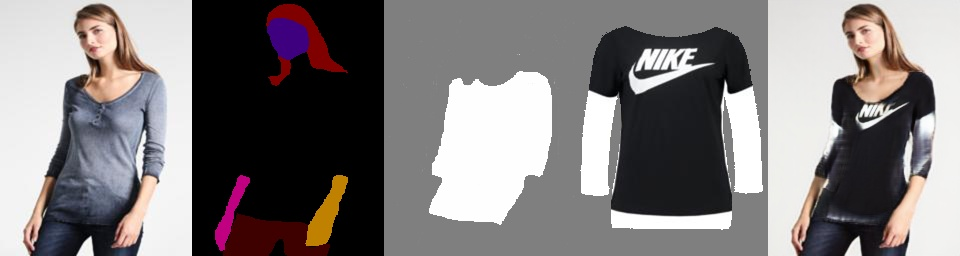

In [45]:
want_file = "000082_0.jpg"
from IPython.display import Image

# Display the image using the f-string
#Image(f"/content/mca-project/ACGPN_inference/mca-project/mca-project/ACGPN_inference/sample/{want_file}")
Image(f"/content/drive/MyDrive/Dataset/Test_Data/mca-project/mca-project/mca-project/mca-project/mca-project/mca-project/ACGPN_inference/sample/{want_file}")


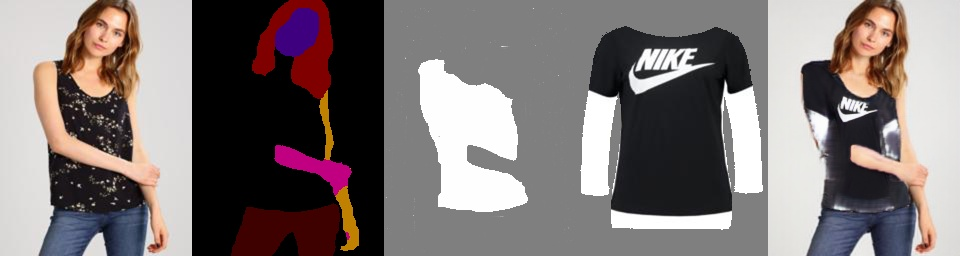

In [47]:
want_file = "000109_0.jpg"
from IPython.display import Image

# Display the image using the f-string
#Image(f"/content/mca-project/ACGPN_inference/mca-project/mca-project/ACGPN_inference/sample/{want_file}")
Image(f"/content/drive/MyDrive/Dataset/Test_Data/mca-project/mca-project/mca-project/mca-project/mca-project/mca-project/ACGPN_inference/sample/{want_file}")


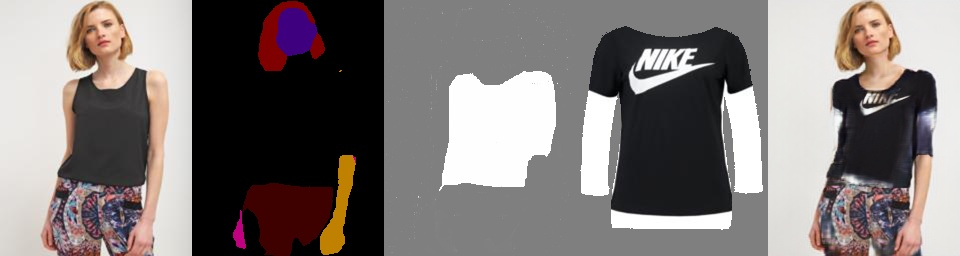

In [49]:
want_file = "000651_0.jpg"
from IPython.display import Image

# Display the image using the f-string
#Image(f"/content/mca-project/ACGPN_inference/mca-project/mca-project/ACGPN_inference/sample/{want_file}")
Image(f"/content/drive/MyDrive/Dataset/Test_Data/mca-project/mca-project/mca-project/mca-project/mca-project/mca-project/ACGPN_inference/sample/{want_file}")


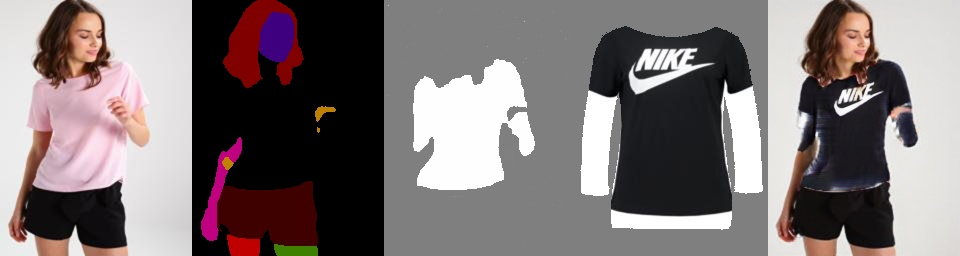

In [51]:
want_file = "001283_0.jpg"
from IPython.display import Image

# Display the image using the f-string
#Image(f"/content/mca-project/ACGPN_inference/mca-project/mca-project/ACGPN_inference/sample/{want_file}")
Image(f"/content/drive/MyDrive/Dataset/Test_Data/mca-project/mca-project/mca-project/mca-project/mca-project/mca-project/ACGPN_inference/sample/{want_file}")
